# Data Exploration

This notebook explores the Filtered data that we get from the PISA 2022 / Philippines

## Get necessary files and libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

ph_df = pd.read_pickle("ph_pisa_2022_filtered.pkl")
print(f"Loaded {len(ph_df)} students.")

Loaded 7193 students.


## Define Risk Levels for Visualization

In [3]:
def get_risk_label(score):
    if score < 358: return 'Critical (<358)'
    elif score < 420: return 'High (358-420)'
    elif score < 482: return 'Moderate (420-482)'
    else: return 'Low Risk (>482)'

# Create the label column for plotting
ph_df['Risk_Category'] = ph_df['PV1MATH'].apply(get_risk_label)

# Define the order for the charts so they make sense
risk_order = ['Critical (<358)', 'High (358-420)', 'Moderate (420-482)', 'Low Risk (>482)']

## Define the Valid Features and Targets

In [ ]:
valid_features = ['ANXMAT', 'BELONG', 'ESCS', 'TEACHSUP', 'BULLIED', 'ICTRES']
targets = ['PV1MATH', 'PV1READ', 'PV1SCIE']

## Set plot style

In [13]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## Check which factors matters most

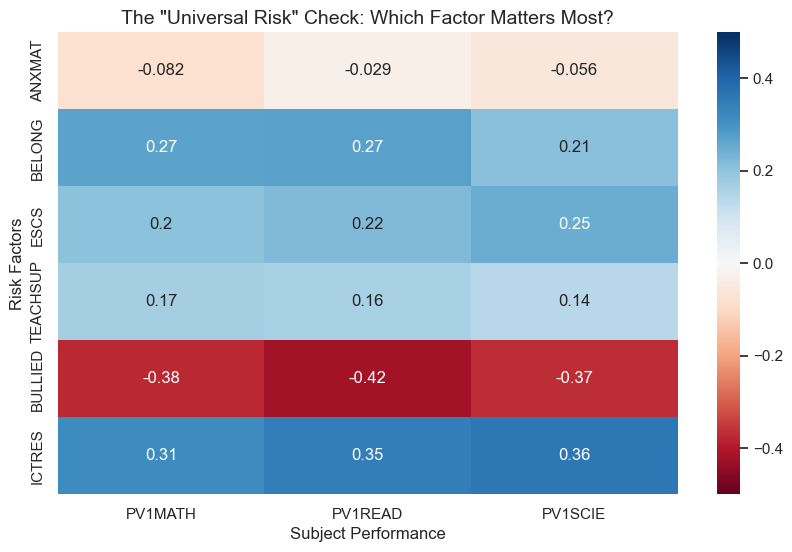

In [14]:
# Calculate correlations
corr_data = ph_df[valid_features + targets].corr()

# Filter to show only how Factors relate to Targets
target_corr = corr_data.loc[valid_features, targets]

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(target_corr, annot=True, cmap='RdBu', center=0, vmin=-0.5, vmax=0.5)
plt.title('The "Universal Risk" Check: Which Factor Matters Most?', fontsize=14)
plt.ylabel('Risk Factors')
plt.xlabel('Subject Performance')
plt.show()

## Universal Risk Check
Does Anxiety kill performance in Reading/Science too?

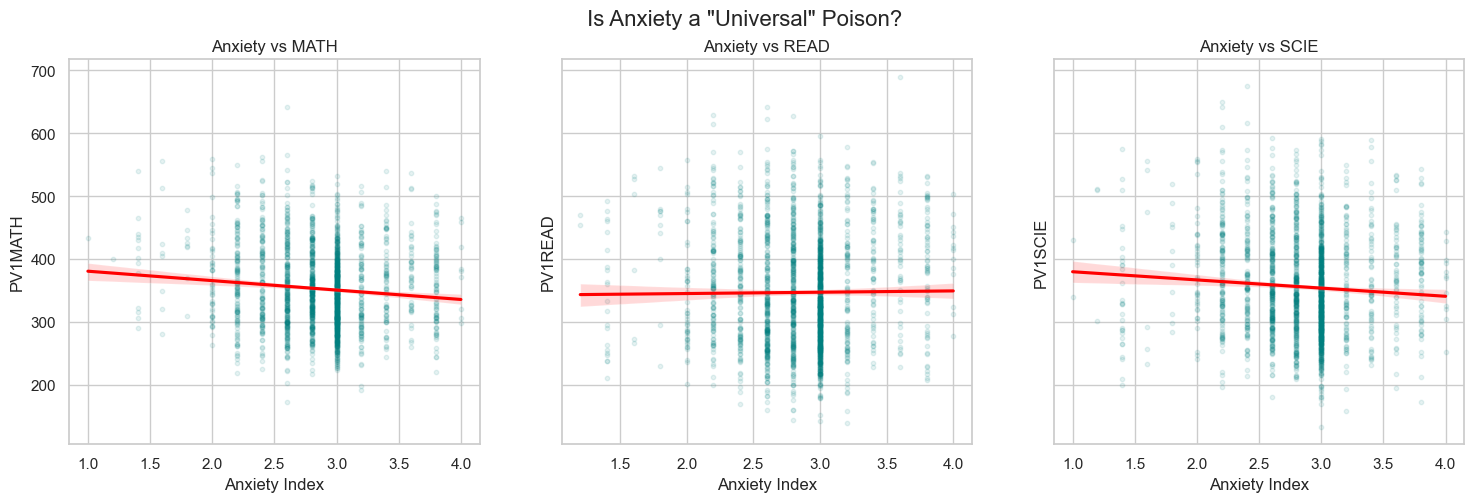

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, subject in enumerate(targets):
    # Hexbin or scatter with regression line
    sns.regplot(
        data=ph_df.sample(2000), 
        x='ANXMAT', 
        y=subject, 
        ax=axes[i], 
        scatter_kws={'alpha':0.1, 's':10, 'color': 'teal'}, 
        line_kws={'color':'red'}
    )
    axes[i].set_title(f'Anxiety vs {subject[3:]}') # Cuts "PV1" from name
    axes[i].set_xlabel('Anxiety Index')

plt.suptitle('Is Anxiety a "Universal" Poison?', fontsize=16)
plt.show()

## THE "RESOURCE GAP" (ICT Resources vs Score)

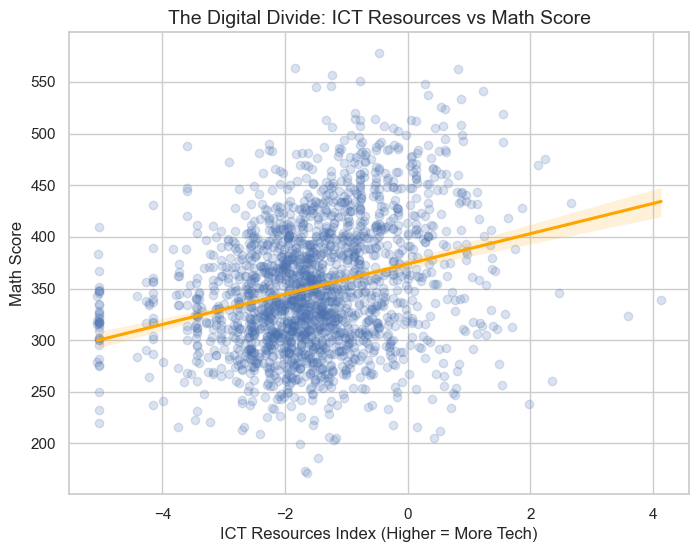

In [16]:
# Testing the "Digital Divide" hypothesis
plt.figure(figsize=(8, 6))
sns.regplot(
    data=ph_df.sample(2000), 
    x='ICTRES', 
    y='PV1MATH', 
    line_kws={'color':'orange'}, 
    scatter_kws={'alpha':0.2}
)
plt.title('The Digital Divide: ICT Resources vs Math Score', fontsize=14)
plt.xlabel('ICT Resources Index (Higher = More Tech)')
plt.ylabel('Math Score')
plt.show()

## Visualization 1: The Proficiency Crisis

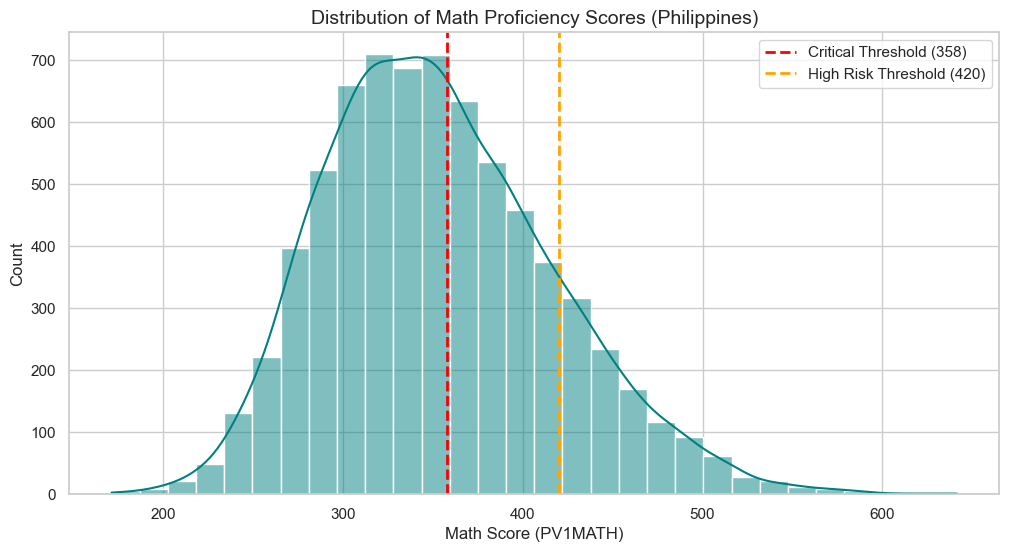

In [7]:
plt.figure()
sns.histplot(ph_df['PV1MATH'], kde=True, color='teal', bins=30)
# Add vertical lines for the thresholds
plt.axvline(358, color='red', linestyle='--', linewidth=2, label='Critical Threshold (358)')
plt.axvline(420, color='orange', linestyle='--', linewidth=2, label='High Risk Threshold (420)')
plt.title('Distribution of Math Proficiency Scores (Philippines)', fontsize=14)
plt.xlabel('Math Score (PV1MATH)')
plt.legend()
plt.show()

## VISUALIZATION 2: The "Reverse Gender Gap" (Box Plot)

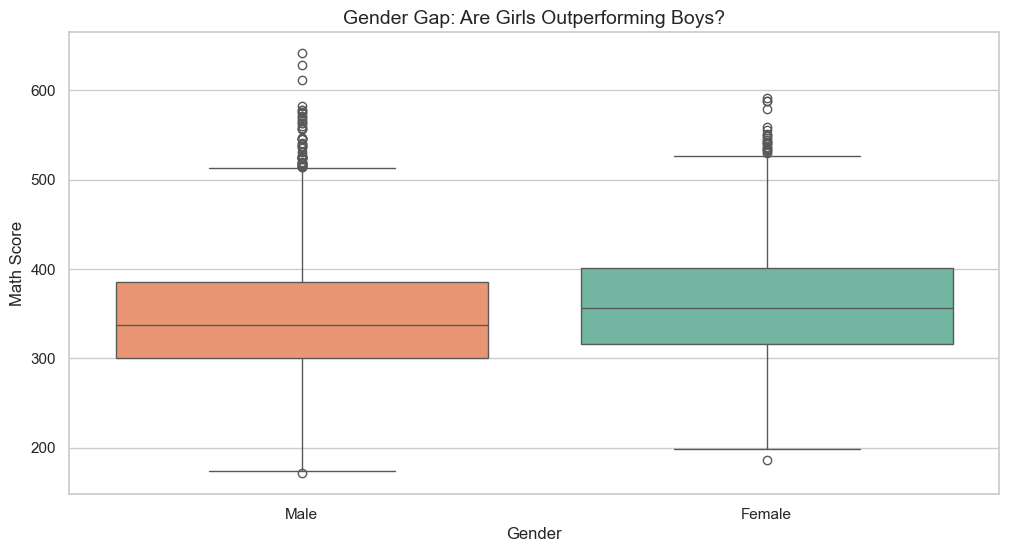

In [23]:
plt.figure()
sns.boxplot(
    data=ph_df, 
    x='Gender', 
    y='PV1MATH', 
    palette="Set2", 
    order=['Male', 'Female'],
    hue='Gender',
    legend=False
)
plt.title('Gender Gap: Are Girls Outperforming Boys?', fontsize=14)
plt.ylabel('Math Score')
plt.show()

## VISUALIZATION 3: Anxiety vs. Performance (Hexbin or Scatter)

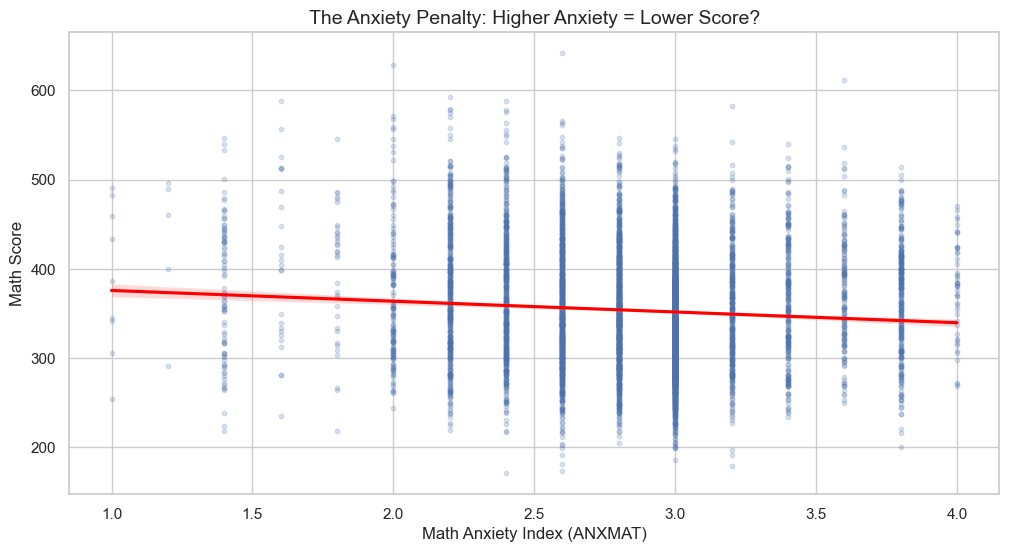

In [21]:
plt.figure()
sns.regplot(data=ph_df, x='ANXMAT', y='PV1MATH', 
            scatter_kws={'alpha':0.2, 's':10}, line_kws={'color':'red'})
plt.title('The Anxiety Penalty: Higher Anxiety = Lower Score?', fontsize=14)
plt.xlabel('Math Anxiety Index (ANXMAT)')
plt.ylabel('Math Score')
plt.show()

## VISUALIZATION 4: Socio-Economic Status vs. Risk (Strip Plot)

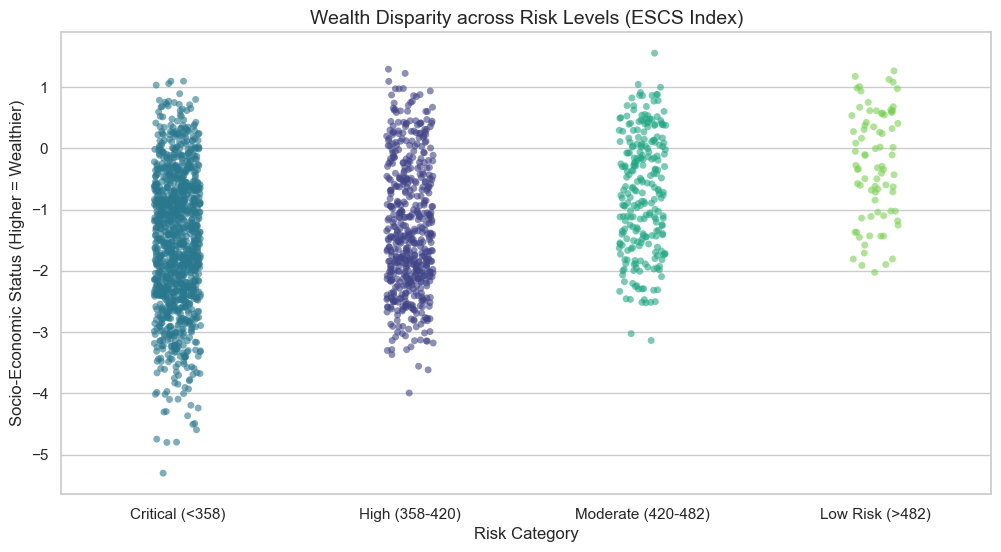

In [26]:
plt.figure()
sns.stripplot(
    data=ph_df.sample(2000), 
    x='Risk_Category', 
    y='ESCS', 
    hue='Risk_Category',
    legend=False,
    order=risk_order, 
    palette='viridis', 
    alpha=0.6, 
    jitter=True
)
plt.title('Wealth Disparity across Risk Levels (ESCS Index)', fontsize=14)
plt.xlabel('Risk Category')
plt.ylabel('Socio-Economic Status (Higher = Wealthier)')
plt.show()

## VISUALIZATION 5: The "Hidden Predictors" (Correlation Heatmap)

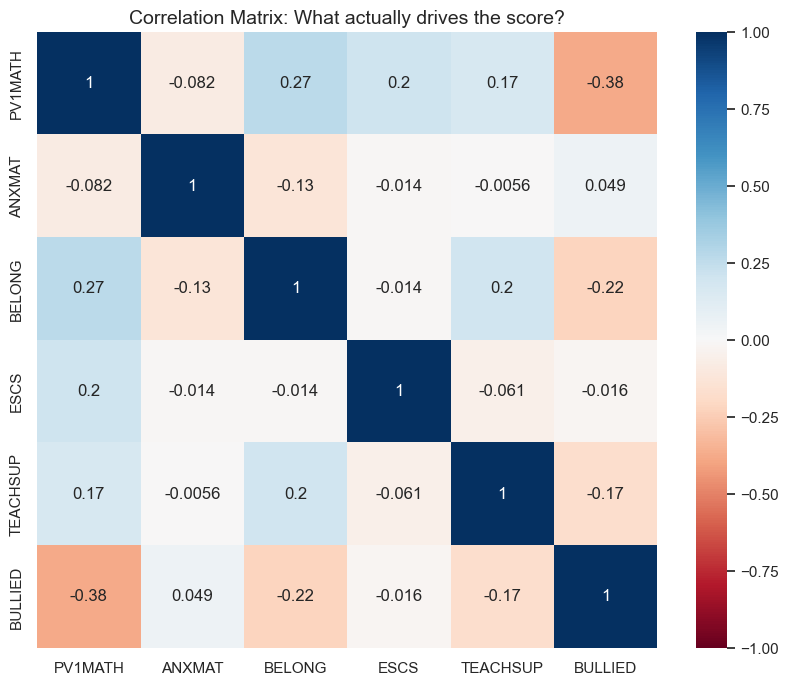

In [22]:
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation
corr_cols = ['PV1MATH', 'ANXMAT', 'BELONG', 'ESCS', 'TEACHSUP', 'BULLIED']
# Compute correlation
corr_matrix = ph_df[corr_cols].corr()
# Plot
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix: What actually drives the score?', fontsize=14)
plt.show()